# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [14]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [18]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [36]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components':[5, 15, 22, 23, 24, 35, 45], 
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)

print ("Best parameter (CV score=%0.3f):" % search.best_score_)
print (search.best_params_)

Best parameter (CV score=0.919):
{'logistic__alpha': 0.01, 'pca__n_components': 23}


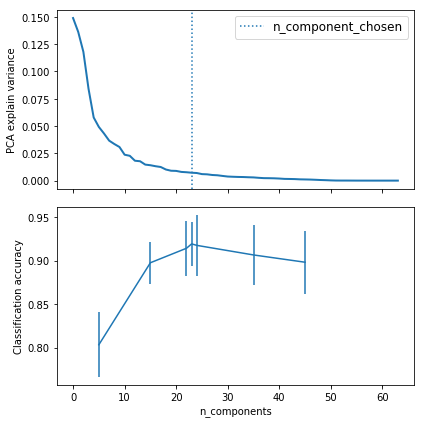

In [53]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel("PCA explain variance")

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label= 'n_component_chosen')
ax0.legend(prop=dict(size=12))

# 繪製不同採樣點的分類正確率
result = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clf=result.groupby(components_col).apply(lambda x:x.nlargest(1,'mean_test_score'))

best_clf.plot(x=components_col,y='mean_test_score', yerr='std_test_score', legend=False,ax=ax1)
ax1.set_ylabel("Classification accuracy")
ax1.set_xlabel("n_components")
plt.tight_layout()
plt.show()

In [40]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044201,1.850565e-02,0.00020,0.00040,0.0001,5,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.780220,0.635359,0.816156,0.756303,0.726761,0.742960,0.061261,14
1,0.046800,9.866209e-03,0.00312,0.00624,0.0001,15,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.887363,0.825967,0.902507,0.929972,0.839437,0.877049,0.038934,12
2,0.049920,1.528470e-02,0.00000,0.00000,0.0001,22,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.914835,0.850829,0.916435,0.943978,0.898592,0.904934,0.030732,6
3,0.056040,1.271963e-02,0.00020,0.00040,0.0001,23,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.931319,0.881215,0.916435,0.941176,0.881690,0.910367,0.024888,4
4,0.062160,1.369086e-02,0.00312,0.00624,0.0001,24,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.914835,0.853591,0.924791,0.941176,0.887324,0.904344,0.030823,7
5,0.072001,7.851201e-03,0.00020,0.00040,0.0001,35,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.931319,0.842541,0.924791,0.935574,0.898592,0.906563,0.034494,5
6,0.084522,2.130550e-02,0.00040,0.00049,0.0001,45,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.901099,0.839779,0.899721,0.952381,0.892958,0.897188,0.035726,11
7,0.024960,1.248008e-02,0.00000,0.00000,0.01,5,"{'logistic__alpha': 0.01, 'pca__n_components': 5}",0.780220,0.762431,0.810585,0.871148,0.791549,0.803187,0.037410,13
8,0.034320,6.239939e-03,0.00000,0.00000,0.01,15,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.914835,0.867403,0.902507,0.929972,0.873239,0.897591,0.023976,10
9,0.046800,9.866285e-03,0.00312,0.00624,0.01,22,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.942308,0.875691,0.916435,0.955182,0.881690,0.914261,0.031668,3


In [49]:
best_clf

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
5,0,0.044201,0.018506,0.00020,0.00040,0.0001,5,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.780220,0.635359,0.816156,0.756303,0.726761,0.742960,0.061261,14
15,8,0.034320,0.006240,0.00000,0.00000,0.01,15,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.914835,0.867403,0.902507,0.929972,0.873239,0.897591,0.023976,10
22,9,0.046800,0.009866,0.00312,0.00624,0.01,22,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.942308,0.875691,0.916435,0.955182,0.881690,0.914261,0.031668,3
23,10,0.053040,0.015909,0.00000,0.00000,0.01,23,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.936813,0.883978,0.938719,0.943978,0.892958,0.919289,0.025434,1
24,11,0.056160,0.012480,0.00000,0.00000,0.01,24,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.945055,0.870166,0.949861,0.943978,0.878873,0.917586,0.035327,2
35,5,0.072001,0.007851,0.00020,0.00040,0.0001,35,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.931319,0.842541,0.924791,0.935574,0.898592,0.906563,0.034494,5
45,13,0.162240,0.040198,0.00000,0.00000,0.01,45,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.912088,0.853591,0.905292,0.955182,0.864789,0.898188,0.036322,9
